In [4]:
from matplotlib import pyplot as plt
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

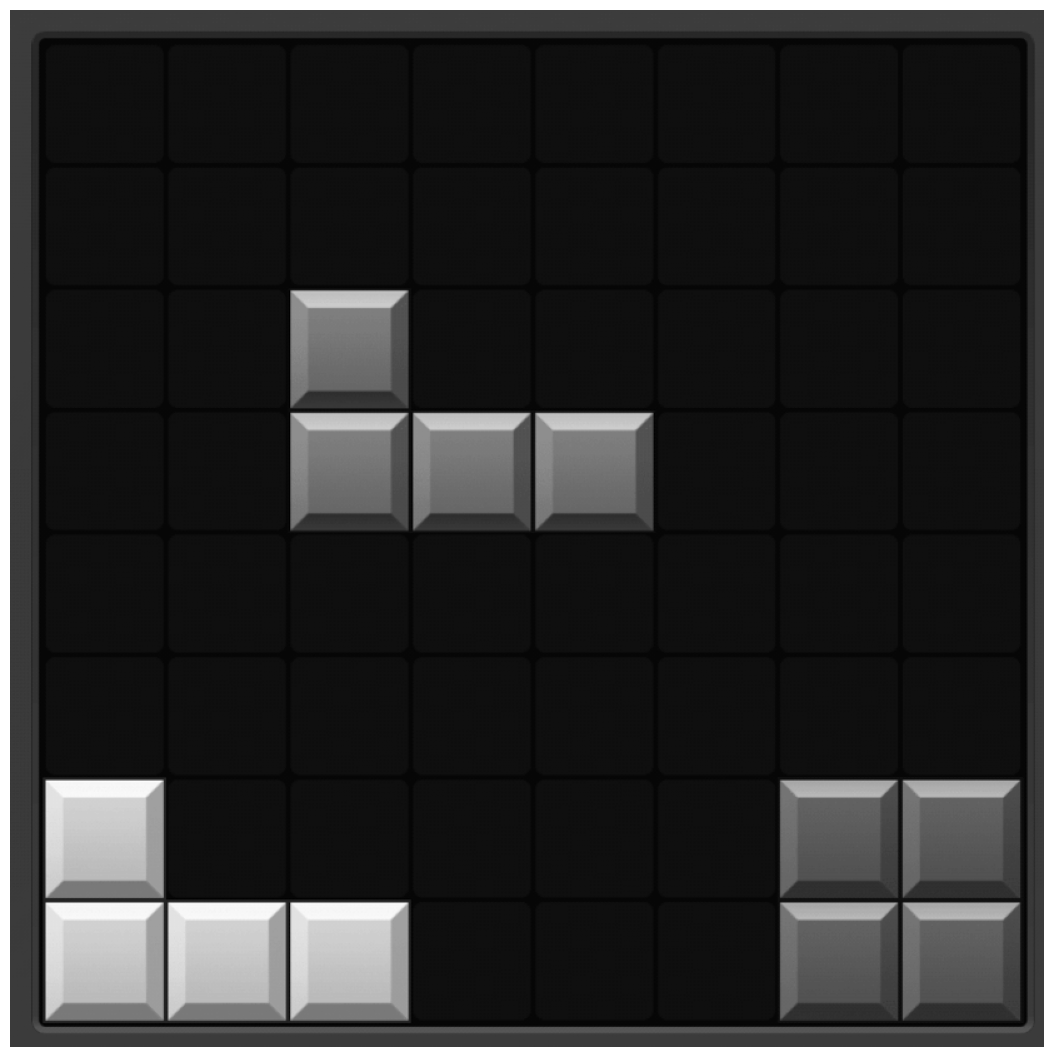

rows: 830, columns: 827
[[123, 123], [123, 221], [123, 319], [123, 417], [123, 515], [123, 612], [123, 710], [221, 123], [221, 221], [221, 319], [221, 417], [221, 515], [221, 612], [221, 710], [319, 123], [319, 221], [319, 319], [319, 417], [319, 515], [319, 612], [319, 710], [417, 123], [417, 221], [417, 319], [417, 417], [417, 515], [417, 612], [417, 710], [515, 123], [515, 221], [515, 319], [515, 417], [515, 515], [515, 612], [515, 710], [613, 123], [613, 221], [613, 319], [613, 417], [613, 515], [613, 612], [613, 710], [710, 123], [710, 221], [710, 319], [710, 417], [710, 515], [710, 612], [710, 710]]


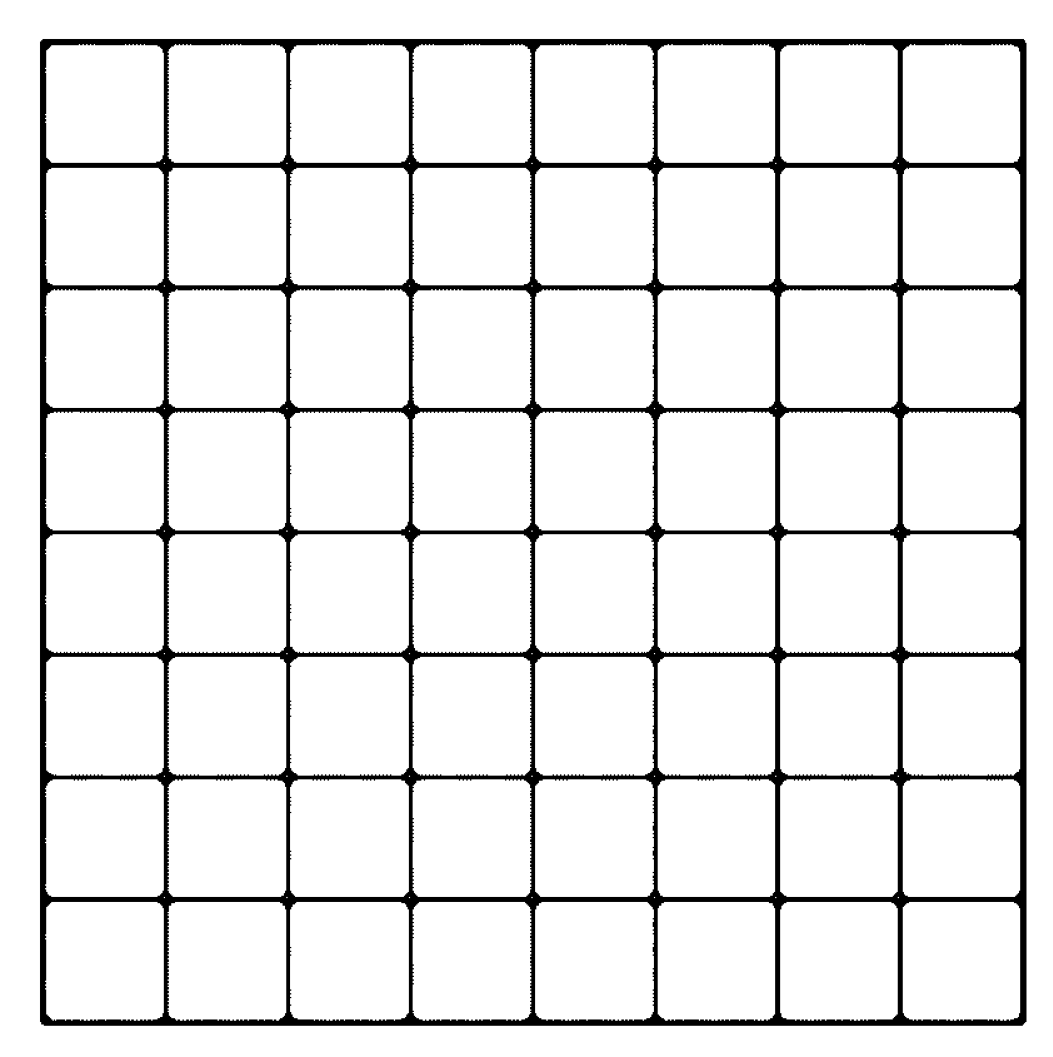

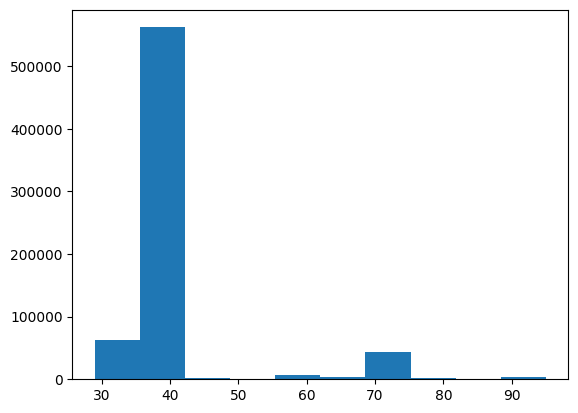

In [129]:
import os
from matplotlib import pyplot as plt
import cv2
import math


# os.system("screencapture temp/screen.png")
img = cv2.imread("/Users/sagewong/git/Block-Blast-Data-Analyst/temp/screen.png", 1)
imgBoard = img[360:1190, 173:1000]
imgBoard = cv2.cvtColor(imgBoard, cv2.COLOR_BGR2GRAY)

import numpy as np
rows, cols = imgBoard.shape
print(f"rows: {rows}, columns: {cols}")
x = np.zeros(rows*cols)
for i in range(rows):
        for j in range(cols):
            x[i + j*rows] = imgBoard[i, j]
            if imgBoard[i, j] < 35:
                imgBoard[i, j] = 0
            else:
                imgBoard[i, j] = 255
corners = []
distances = []
for i in range(25, rows-50):
    for j in range(25, cols-50):
        passesTest = True
        for z in range(50):
            if imgBoard[i-25 + z, j] == 255:
                passesTest = False
                break
        for z in range(50):
            if imgBoard[i, j-25+z] == 255:
                passesTest = False
                break
        if passesTest:
            if len(corners) > 0:
                passesSecondTest = True
                for corner in corners:
                    if math.sqrt((corner[0] - i)**2 + (corner[1] - j)**2) < 25:
                        passesSecondTest = False
                        break
                if passesSecondTest:
                    distances.append(math.sqrt((corners[0][0] - i)**2 + (corners[0][1] - j)**2))
                    corners.append([i, j])
            else:
                corners.append([i, j])

for i in corners:
    imgBoard[i[0], i[1]] = 255

print(corners)

cv2.imwrite("temp/imgBoard.png", imgBoard)
display("temp/imgBoard.png")
plt.hist(x)
plt.show()



[[123, 123], [123, 221], [123, 319], [123, 417], [123, 515], [123, 612], [123, 710], [221, 123], [221, 221], [221, 319], [221, 417], [221, 515], [221, 612], [221, 710], [319, 123], [319, 221], [319, 319], [319, 417], [319, 515], [319, 612], [319, 710], [417, 123], [417, 221], [417, 319], [417, 417], [417, 515], [417, 612], [417, 710], [515, 123], [515, 221], [515, 319], [515, 417], [515, 515], [515, 612], [515, 710], [613, 123], [613, 221], [613, 319], [613, 417], [613, 515], [613, 612], [613, 710], [710, 123], [710, 221], [710, 319], [710, 417], [710, 515], [710, 612], [710, 710]]
smallestX: 123 smallestY: 123 largestX: 710 largestY: 710
smallestX: 123 smallestY: 25.0 largestX: 710 largestY: 710
smallestX: 123 smallestY: 25.0 largestX: 710 largestY: 808.0
smallestX: 123 smallestY: 25.0 largestX: 808.0 largestY: 808.0
[[123, 123], [123, 221], [123, 319], [123, 417], [123, 515], [123, 612], [123, 710], [221, 123], [221, 221], [221, 319], [221, 417], [221, 515], [221, 612], [221, 710], [

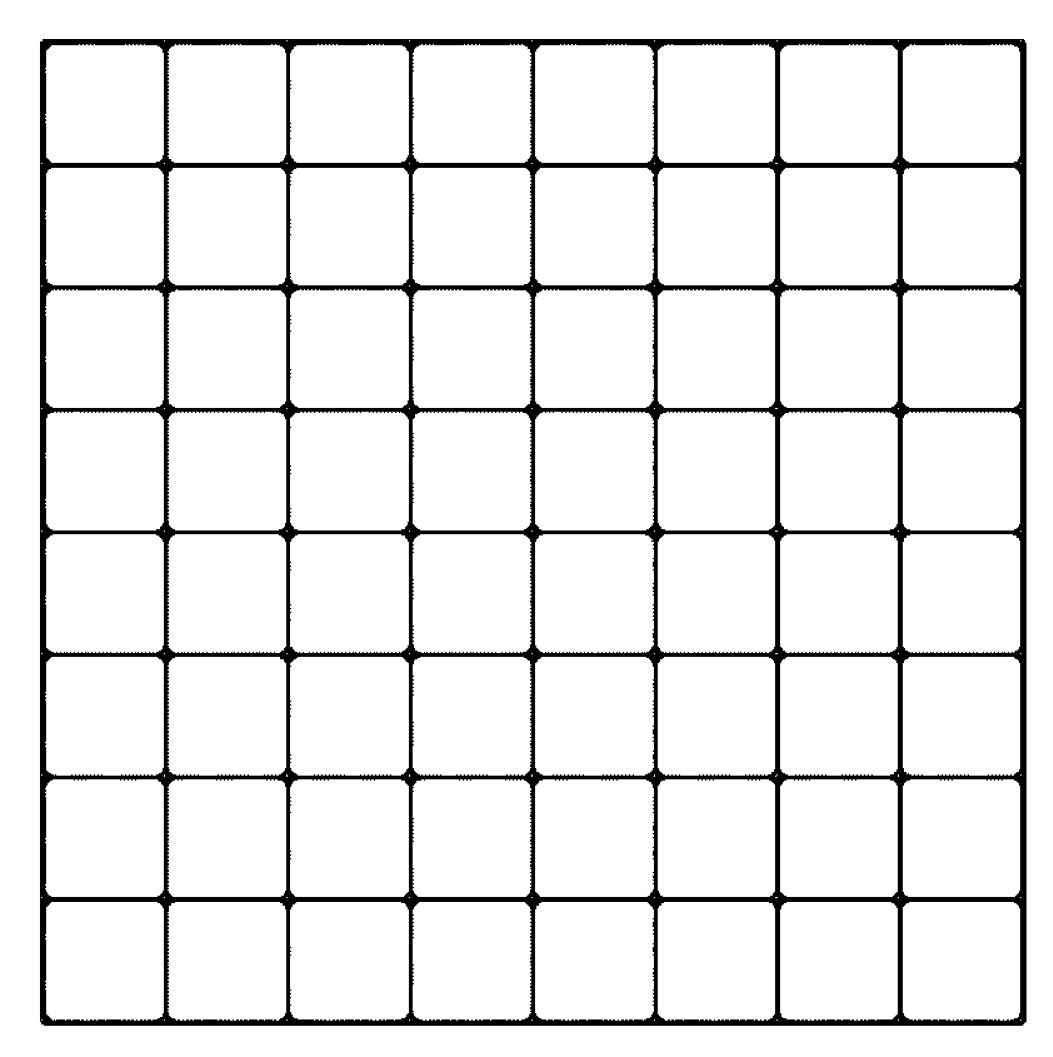

In [130]:
def duplicateRow(input, axis, direction, distance):
    smallestX = 10000
    for i in input:
        if i[0] < smallestX:
            smallestX = i[0]
    smallestY = 10000
    for i in input:
        if i[1] < smallestY:
            smallestY = i[1]
    largestX = 0
    for i in input:
        if i[0] > largestX:
            largestX = i[0]
    largestY = 0
    for i in input:
        if i[1] > largestY:
            largestY = i[1]
    print(f"smallestX: {smallestX} smallestY: {smallestY} largestX: {largestX} largestY: {largestY}")
    littleDudes = []
    if axis == "x" and direction == 1:
        for i in input:
            if abs(i[0] - largestX) < 5:
                littleDudes.append([i[0] + distance, i[1]])
    if axis == "x" and direction == -1:
        for i in input:
            if abs(i[0] - smallestX) < 5:
                littleDudes.append([i[0] - distance, i[1]])
    if axis == "y" and direction == 1:
        for i in input:
            if abs(i[1] - largestY) < 5:
                littleDudes.append([i[0], i[1] + distance])
    if axis == "y" and direction == -1:
        for i in input:
            if abs(i[1] - smallestY) < 5:
                littleDudes.append([i[0], i[1] - distance])
    for i in littleDudes:
        input.append(i)
    return input
print(corners)
output = []
output = duplicateRow(corners.copy(), "y", -1, min(distances))
output = duplicateRow(output.copy(), "y", 1, min(distances))
output = duplicateRow(output.copy(), "x", 1, min(distances))
output = duplicateRow(output.copy(), "x", -1, min(distances))

print(output)
for i in output:
    imgBoard[int(i[1]), int(i[0])] = 255
cv2.imwrite("temp/imgBoard2.png", imgBoard)
display("temp/imgBoard2.png")

In [162]:
a = np.array(output)
sorted_indices = np.lexsort((a[:,1], a[:,0]))
sorted_points = a[sorted_indices]
# sorted_points = np.reshape(sorted_points, (2, -1))
sorted_points = sorted_points.reshape(-1, 9, 2)
finalCornerCoords = []
for group in range(sorted_points.shape[0]):
    for row in range(sorted_points[group].shape[0]):
        try:
            finalCornerCoords.append([sorted_points[group][row], sorted_points[group][row+1], sorted_points[group+1][row], sorted_points[group+1][row+1]])
        except:
            pass
print(len(finalCornerCoords))

64


In [167]:
count = 0
for coords in finalCornerCoords:
    a = imgBoard[int(min([i[0] for i in coords])):int(max([i[0] for i in coords])), int(min([i[1] for i in coords])):int(max([i[1] for i in coords]))]
    cv2.imwrite(f"imgBoard{count}.png", a)
    
    count += 1

In [180]:
os.system("screencapture temp/screen.png")
img = cv2.imread("/Users/sagewong/git/Block-Blast-Data-Analyst/temp/screen.png", 1)
imgBoard = img[360:1190, 173:1000]
imgBoard = cv2.cvtColor(imgBoard, cv2.COLOR_BGR2GRAY)
count = 0
bigList = np.zeros(64)
for coords in finalCornerCoords:
    a = imgBoard[int(min([i[0] for i in coords])):int(max([i[0] for i in coords])), int(min([i[1] for i in coords])):int(max([i[1] for i in coords]))]
    cv2.imwrite(f"imgBoard{count}.png", a)
    if np.average(a.flatten()) > 50:
        bigList[count] = 1
    else:
        bigList[count] = 0
    count += 1
print(np.reshape(bigList, (8, -1)))




[[0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 1. 1. 1. 0. 1. 1. 1.]
 [0. 1. 1. 1. 0. 1. 1. 1.]
 [0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1.]]


In [87]:
import os
import cv2
import numpy as np
import math

os.system("screencapture temp/screen.png")
img = cv2.imread("/Users/sagewong/git/Block-Blast-Data-Analyst/temp/screen.png", 1)
#
screenCoords = [[1258, 1500, 215, 445], [1258, 1500, 468, 710], [1258,1500,733,961]]
for coords in screenCoords:
    imgBoard = img[coords[0]:coords[1], coords[2]:coords[3]]
    # cv2.imwrite("temp/imgBoard2.png", imgBoard)
    # display("temp/imgBoard2.png")
    imgBoard2 = cv2.cvtColor(imgBoard, cv2.COLOR_BGR2GRAY)

    ret,thresh1 = cv2.threshold(imgBoard2,80,255,cv2.THRESH_BINARY)
    # cv2.imwrite("temp/imgBoard3.png", thresh1)
    # display("temp/imgBoard3.png")
    contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(imgBoard, contours, -1, (0,255,0), 3)

    # cv2.imwrite("temp/imgBoard4.png", imgBoard)
    # display("temp/imgBoard4.png")

    simplifiedContours = [i[0][0] for i in contours]
    minXDistance = 1000
    for i in range(len(simplifiedContours)):
        for j in range(i + 1, len(simplifiedContours)):
            distanceFound = abs(simplifiedContours[i][0] - simplifiedContours[j][0])
            if distanceFound < minXDistance and distanceFound>5:
                minXDistance = distanceFound
    minYDistance = 1000
    # print(minXDistance)
    for i in range(len(simplifiedContours)):
        for j in range(i + 1, len(simplifiedContours)):
            distanceFound = abs(simplifiedContours[i][1] - simplifiedContours[j][1])
            if distanceFound < minYDistance and distanceFound>5:
                minYDistance = distanceFound
    # print(minYDistance)
    distance = min(minXDistance, minYDistance)
    minX = min([i[0][0][0] for i in contours])
    # print("Minimum x found: " + str(minX))
    maxX = max([i[0][0][0] for i in contours])
    # print("Maximum x found: " + str(maxX))
    minY = min([i[0][0][1] for i in contours])
    # print("Minimum y found: " + str(minY))
    maxY = max([i[0][0][1] for i in contours])
    # print("Maximum y found: " + str(maxY))

    # print(simplifiedContours)

    hi = np.zeros((round((maxY-minY)/distance)+1,round((maxX-minX)/distance)+1))
    for x in range(round((maxX-minX)/distance)+1):
        for y in range(round((maxY-minY)/distance)+1):
            xVal = minX + x*distance
            yVal = minY + y*distance
            for i in simplifiedContours:
                if math.sqrt((xVal-i[0])**2 + (yVal-i[1])**2) < 5:
                    hi[y][x] = 1
                    break
    print(hi)

[[1. 1.]
 [1. 0.]
 [1. 0.]]
[[1. 1. 1. 1. 1.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]
